In [177]:
#Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
import json
import hvplot.pandas
import plotly.express as px

In [178]:
# Load .env enviroment variables
load_dotenv()
AlphaVantageKey = os.getenv("ALPHA_VANTAGE_KEY") 

In [179]:
# Set up Panel Plotly extension
pn.extension('plotly')

In [180]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [181]:
#Get stock data
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-19", tz="America/New_York").isoformat()

# Set the ticker information
tickers = input("Please enter stock ticker\n ")

# Get 3 year's worth of historical price data

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker=pd.DataFrame(df_ticker)
df_ticker

Please enter stock ticker
  NVDA


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:19: DeprecatedWarning:

get_barset is deprecated as of v1.0.0. Use get_bars instead



NVDA                                      
                             open      high       low   close    volume
time                                                                   
2020-05-01 00:00:00-04:00  284.35  288.9000  280.8432  282.84   7840411
2020-05-04 00:00:00-04:00  280.88  291.8400  280.8800  291.28  14505166
2020-05-05 00:00:00-04:00  295.47  300.2700  291.2900  293.63   8729950
2020-05-06 00:00:00-04:00  296.93  302.0000  295.4100  297.75  15249165
2020-05-07 00:00:00-04:00  303.38  307.4100  301.3230  304.88  17578346
...                           ...       ...       ...     ...       ...
2022-01-12 00:00:00-05:00  280.68  285.9500  276.0800  280.00  35620987
2022-01-13 00:00:00-05:00  283.77  284.8000  264.9800  265.86  51118368
2022-01-14 00:00:00-05:00  263.00  271.9690  262.1001  269.48  37205105
2022-01-18 00:00:00-05:00  262.62  266.3800  257.7000  259.03  37714537
2022-01-19 00:00:00-05:00  260.69  265.4317  250.5200  250.62  46184928

[434 rows x 5 columns]

In [1]:
#Calculate Bollinger Bands
bolly_band_df = pd.DataFrame()
bolly_band_df['SMA']=df_ticker.iloc[:,3].rolling(window=13).mean()
bolly_band_std=df_ticker.iloc[:,3].rolling(window=13).std()

bolly_band_df['UB']=bolly_band_df['SMA']+(bolly_band_std*2)
bolly_band_df['LB']=bolly_band_df['SMA']-(bolly_band_std*2)


bb_plot = bolly_band_df.hvplot(title='Bollinger Bands')


NameError: name 'pd' is not defined

In [183]:
# Define RSI function

def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df_ticker.iloc[:,3].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [184]:
df_ticker['RSI'] = rsi(df_ticker)
df_ticker['RSI'].dropna().head(20)
df_ticker

NVDA                                        \
                             open      high       low   close    volume   
time                                                                      
2020-05-01 00:00:00-04:00  284.35  288.9000  280.8432  282.84   7840411   
2020-05-04 00:00:00-04:00  280.88  291.8400  280.8800  291.28  14505166   
2020-05-05 00:00:00-04:00  295.47  300.2700  291.2900  293.63   8729950   
2020-05-06 00:00:00-04:00  296.93  302.0000  295.4100  297.75  15249165   
2020-05-07 00:00:00-04:00  303.38  307.4100  301.3230  304.88  17578346   
...                           ...       ...       ...     ...       ...   
2022-01-12 00:00:00-05:00  280.68  285.9500  276.0800  280.00  35620987   
2022-01-13 00:00:00-05:00  283.77  284.8000  264.9800  265.86  51118368   
2022-01-14 00:00:00-05:00  263.00  271.9690  262.1001  269.48  37205105   
2022-01-18 00:00:00-05:00  262.62  266.3800  257.7000  259.03  37714537   
2022-01-19 00:00:00-05:00  260.69  265.4317  250.5200  250.62  46184928   

                                 RSI  
                                      
time                                  
2020-05-01 00:00:00-04:00        NaN  
2020-05-04 00:00:00-04:00        NaN  
2020-05-05 00:00:00-04:00        NaN  
2020-05-06 00:00:00-04:00        NaN  
2020-05-07 00:00:00-04:00        NaN  
...                              ...  
2022-01-12 00:00:00-05:00  44.950844  
2022-01-13 00:00:00-05:00  39.145993  
2022-01-14 00:00:00-05:00  41.238142  
2022-01-18 00:00:00-05:00  37.256205  
2022-01-19 00:00:00-05:00  34.379110  

[434 rows x 6 columns]

In [186]:
df_ticker['RSI UCL'] = 70
df_ticker['RSI LCL'] = 30

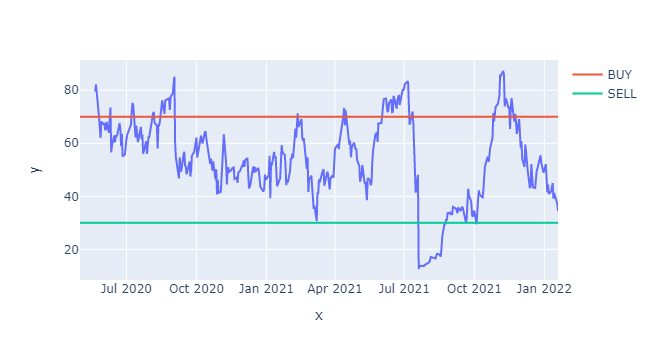

In [188]:
px.scatter(x=df_ticker.index,y = df_ticker.RSI)
rsi_plot = px.line(x=df_ticker.index,y = df_ticker.RSI)
rsi_plot.add_scatter(x=df_ticker.index,y = df_ticker['RSI UCL'],name='BUY')
rsi_plot.add_scatter(x=df_ticker.index,y = df_ticker['RSI LCL'],name='SELL')


In [189]:
#Pull stock metrics from Alphavantage. NOTE: Doesn't appear to work with ETFs and funds, only stocks


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=' + str(tickers) +'&apikey=' + str(AlphaVantageKey)
r = requests.get(url)
stock_metrics = r.json()


{'Symbol': 'NVDA',
 'AssetType': 'Common Stock',
 'Name': 'NVIDIA Corporation',
 'Description': 'Nvidia Corporation is an American multinational technology company incorporated in Delaware and based in Santa Clara, California. It designs graphics processing units (GPUs) for the gaming and professional markets, as well as system on a chip units (SoCs) for the mobile computing and automotive market.',
 'CIK': '1045810',
 'Exchange': 'NASDAQ',
 'Currency': 'USD',
 'Country': 'USA',
 'Sector': 'MANUFACTURING',
 'Industry': 'SEMICONDUCTORS & RELATED DEVICES',
 'Address': '2701 SAN TOMAS EXPRESSWAY, SANTA CLARA, CA, US',
 'FiscalYearEnd': 'January',
 'LatestQuarter': '2021-10-31',
 'MarketCapitalization': '606029480000',
 'EBITDA': '9759000000',
 'PERatio': '74.99',
 'PEGRatio': '2.553',
 'BookValue': '9.51',
 'DividendPerShare': '0.16',
 'DividendYield': '0.0007',
 'EPS': '3.243',
 'RevenuePerShareTTM': '9.75',
 'ProfitMargin': '0.338',
 'OperatingMarginTTM': '0.354',
 'ReturnOnAssetsTTM': 

In [76]:
## Need to find a way to display the relevant lines above

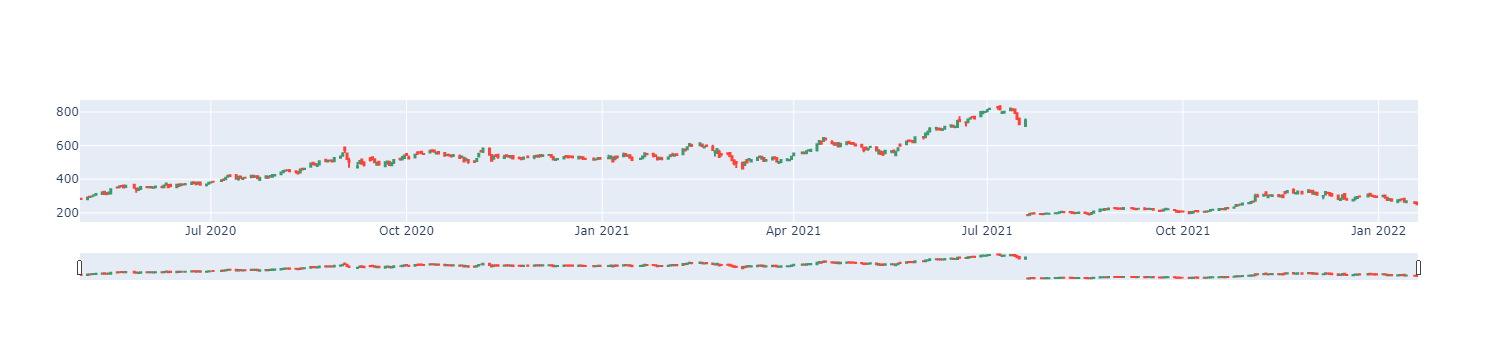

In [190]:
## Plot time series candlestick graph of the price

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df_ticker.index,
                open=df_ticker[tickers,"open"],
                high=df_ticker[tickers,"high"],
                low=df_ticker[tickers,"low"],
                close=df_ticker[tickers,"close"])])

fig.show()